In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Container_traffic.csv')

In [3]:
df.head()

,Month,Container Traffic\n(TEU)
0,01-01-1995,800
1,01-01-1996,946
2,01-01-1997,1119
3,01-01-1998,1323
4,01-01-1999,1565


In [4]:
df.tail()

,Month,Container Traffic\n(TEU)
21,01-01-2016,76000
22,01-01-2017,95000
23,01-01-2018,115000
24,01-01-2019,132000
25,01-01-2020,153000


In [5]:
df.columns=["Year","Container_TEU"]
df.head()

,Year,Container_TEU
0,01-01-1995,800
1,01-01-1996,946
2,01-01-1997,1119
3,01-01-1998,1323
4,01-01-1999,1565


In [6]:
df['Year']=pd.to_datetime(df['Year'])

In [7]:
df.head()

,Year,Container_TEU
0,1995-01-01,800
1,1996-01-01,946
2,1997-01-01,1119
3,1998-01-01,1323
4,1999-01-01,1565


In [8]:
df.set_index('Year',inplace=True)
df.head()

,Container_TEU
Year,
1995-01-01,800
1996-01-01,946
1997-01-01,1119
1998-01-01,1323
1999-01-01,1565


In [9]:
df.describe()

,Container_TEU
count,26.000000
mean,36869.384615
std,44146.244806
min,800.000000
25%,2500.000000
50%,19000.000000
75%,49500.000000
max,153000.000000


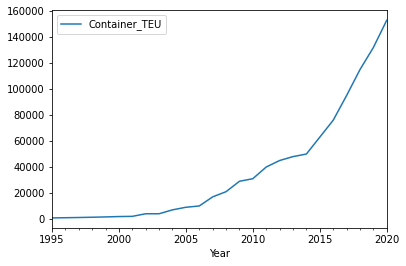

In [10]:
df.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def adfuller_test(Container_TEU):
    result=adfuller(Container_TEU)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df['Container_TEU'])

ADF Test Statistic : 9.986947994866744
p-value : 1.0
#Lags Used : 0
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [20]:
df['Container_TEU First Difference'] = df['Container_TEU'] - df['Container_TEU'].shift(1)

In [21]:
adfuller_test(df['Container_TEU First Difference'].dropna())

ADF Test Statistic : 2.5118631315117805
p-value : 0.9990535762999134
#Lags Used : 8
Number of Observations Used : 16
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [22]:
import statsmodels.api as sm

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [95]:
model=sm.tsa.statespace.SARIMAX(df['Container_TEU'],order=(1, 1, 1),seasonal_order=(3,3,3,4))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


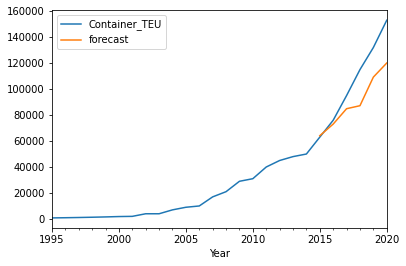

In [96]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Container_TEU','forecast']].plot()

In [97]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]

In [98]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [99]:
future_df=pd.concat([df,future_datest_df])

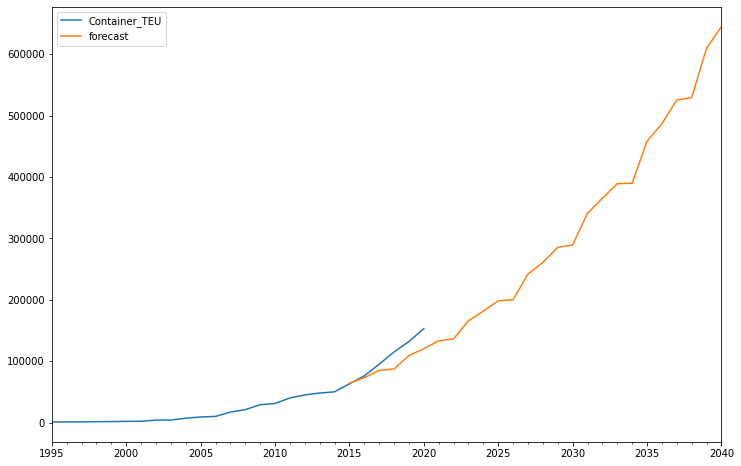

In [100]:
future_df['forecast'] = results.predict(start = 20, end = 46, dynamic= True)  
future_df[['Container_TEU', 'forecast']].plot(figsize=(12, 8))

In [101]:
future_df[['Container_TEU', 'forecast']]

,Container_TEU,forecast
1995-01-01,800,NaN
1996-01-01,946,NaN
1997-01-01,1119,NaN
1998-01-01,1323,NaN
1999-01-01,1565,NaN
2000-01-01,1851,NaN
2001-01-01,2000,NaN
2002-01-01,4000,NaN
2003-01-01,4000,NaN
2004-01-01,7000,NaN
